#**Data Preprocessing**

##import library##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


##import dataset

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


shape of dataset

In [3]:
df.shape

(1338, 7)

information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##describe of dataset

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


##Datase column names

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

##check missing values

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#**Feature Engineering**

##convert sex column in categorical value

In [8]:
df['sex'].unique()
df['sex'] = df['sex'].map({'female':0, 'male':1})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


##convert smoker column in categorical value

In [9]:
df['smoker'].unique()
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


##convert region column in categorical value

In [10]:
df['region'].unique()
df['region'] = df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95


#**Exploratory Data Analysis**##

##Age column

In [11]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [12]:
df.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

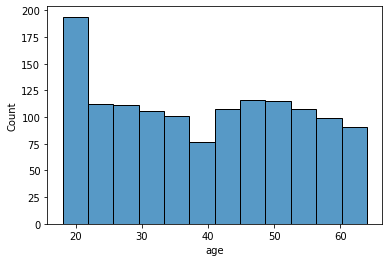

In [13]:
sns.histplot(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


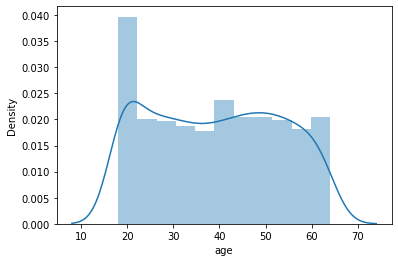

In [14]:
sns.distplot(df.age)

##Bmi column

In [15]:
df.bmi

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64

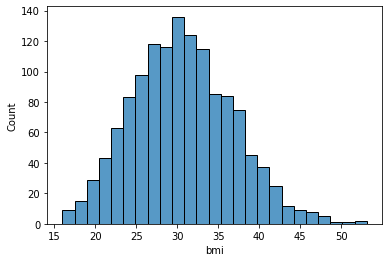

In [16]:
sns.histplot(df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


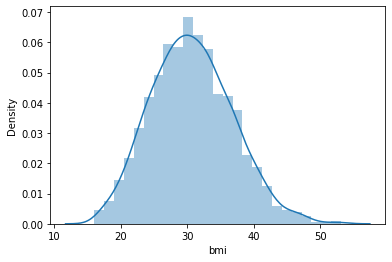

In [17]:
sns.distplot(df.bmi)

##children column

In [18]:
df.children

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [19]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

In [20]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

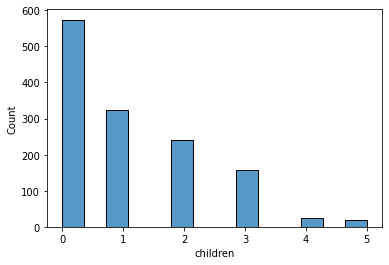

In [21]:
sns.histplot(df.children)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


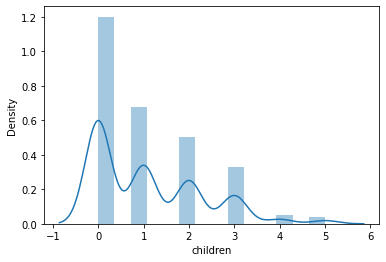

In [22]:
sns.distplot(df.children)

##sex column

In [23]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

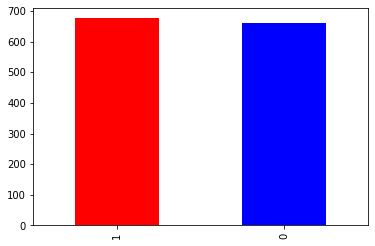

In [24]:
df['sex'].value_counts().plot(kind="bar",color=["red","blue"])

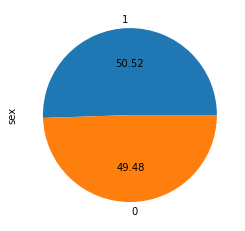

In [25]:
df['sex'].value_counts().plot(kind="pie", autopct="%.2f")

##smoker column

In [26]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

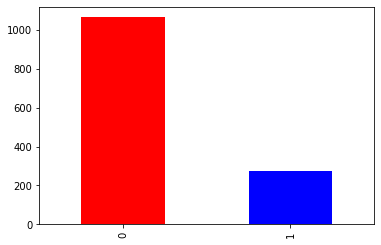

In [27]:
df['smoker'].value_counts().plot(kind="bar",color=["red","blue"])

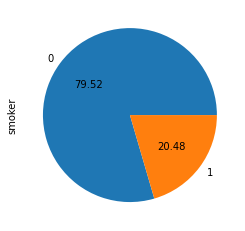

In [28]:
df['smoker'].value_counts().plot(kind="pie", autopct="%.2f")

##region column

In [29]:
df['region'].value_counts()

2    364
3    325
1    325
4    324
Name: region, dtype: int64

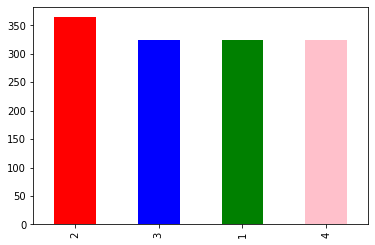

In [30]:
df['region'].value_counts().plot(kind="bar",color=["red","blue","green","pink"])

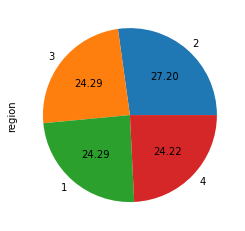

In [31]:
df['region'].value_counts().plot(kind="pie", autopct="%.2f")

##age vs expenses

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


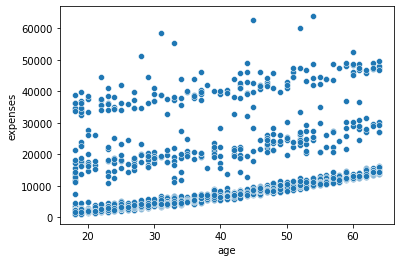

In [32]:
sns.scatterplot(df.age,df.expenses)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


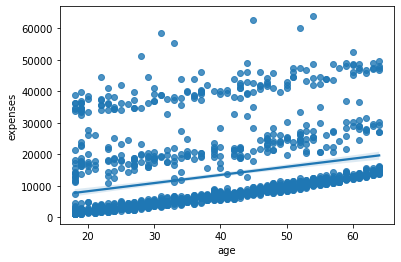

In [33]:
sns.regplot(df["age"], df["expenses"])

##bmi vs expenses

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


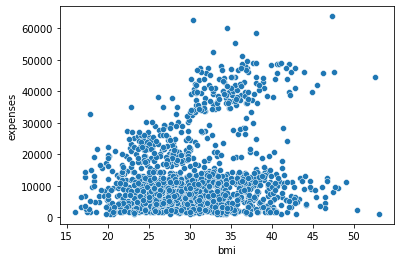

In [34]:
sns.scatterplot(df.bmi,df.expenses)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


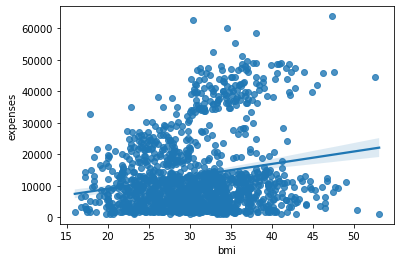

In [35]:
sns.regplot(df["bmi"], df["expenses"])

In [36]:
x = df.drop('expenses', axis=True)
y = df['expenses']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

#**creating model**

##Linear regression

In [38]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
pred = model.predict(x_test)
pred

array([10947.01321022,  9773.97988985, 38037.20043082, 16081.49256255,
        7017.88380035,  4169.26085121,  1740.0255663 , 14278.37550118,
        9019.63400284,  7559.97413905,  4742.10864815, 10283.74801155,
        8592.21271034,  4169.54768204, 27968.38950593, 11038.78914432,
       11277.88138013,  6199.8939384 ,  8281.93523721, 27266.38269733,
       33686.6864624 , 14240.97863949, 11742.87805002, 32408.13005787,
        4484.90244347,  9252.96324028,  1338.92349458, 10083.64922696,
        4120.60219266, 10423.0244818 ,  9036.28801629, 40162.74552585,
       15326.74637075, 13540.86336139, 24971.39607096,  5262.84609563,
       12818.80895031, 30537.96854046, 33511.05231235,  3477.9382708 ,
        4182.6064784 ,  4333.29689698, 30637.59768018, 39379.83805935,
       28081.77515766,  5117.81473714, 10909.6232406 ,  7864.8593956 ,
        3775.74140831, 10535.37095163,  5769.65787735,  3517.18160858,
       32835.74608635, 38446.78573846, 16115.67435091,  7186.98902428,
      

In [40]:
error = np.sqrt(metrics.mean_absolute_error(y_test,pred))
error

63.22919055564156

In [41]:
print("R Score :",r2_score(pred,y_test))

R Score : 0.7214341516381582


##support vector regression

In [42]:
model1 = SVR(kernel = "linear")
model1.fit(x_train,y_train)

SVR(kernel='linear')

In [43]:
pred1 = model1.predict(x_test)
pred1

array([10489.89900818,  9322.27155921, 10053.06506108, 12823.6734764 ,
       10286.92241065,  5799.8385308 ,  1574.50551576, 10966.93788881,
        7526.35981221,  5604.38525849,  6608.23724945, 10488.59781056,
        8147.8021036 ,  5362.833956  ,  4005.59285188, 10622.77481948,
       12607.86314309,  3877.62140583,  7226.88451995,  2240.31068096,
       10908.83056977, 12059.56578589, 10614.59083729,  9282.46366966,
        2344.54159625,  5458.62959845,  4270.47763224,  7941.86302894,
        4825.07384946,  9087.17156231,  8064.47849794, 12625.6004331 ,
       12879.23613948, 11015.00472604,  3396.5231024 ,  4765.20823611,
        9218.73439984,  4277.78712372,  8004.23159461,  1760.5552788 ,
        6392.11456491,  4230.28776103,  7316.75956609, 12729.67390136,
        1525.10299398,  2740.56019379, 10624.20913624,  8054.57673483,
        5035.26814402, 12005.33482489,  2875.51770025,  2473.57715354,
        9635.30775455, 11274.62439837, 11958.97399245,  4151.41745066,
      

In [44]:
error = np.sqrt(metrics.mean_absolute_error(y_test,pred1))
error

81.84950211698265

In [45]:
print("R Score :",r2_score(pred1,y_test))

R Score : -11.373608858338306
